In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("../../")
from paleoSpec import CalcSpectra

In [3]:
# Set up some plotting settings
fs = 14
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'legend.fontsize': fs,
                     'axes.labelsize': fs,
                     'axes.titlesize': fs,
                     'xtick.labelsize': fs,
                     'ytick.labelsize': fs})
plt.rcParams["figure.figsize"] = (9,7)

plt_colors = ['k',
              '#1b9e77',
              '#d95f02',
              '#7570b3',
              '#e7298a',
              '#66a61e',
              '#e6ab02',
              '#a6761d',
              '#666666']

In [4]:
# initialize Spectrum Generator
mineral = "Gypsum"
switch_keep_H = False
SpecCalculator = CalcSpectra.CalcSpectra(mineral, switch_keep_H=switch_keep_H)

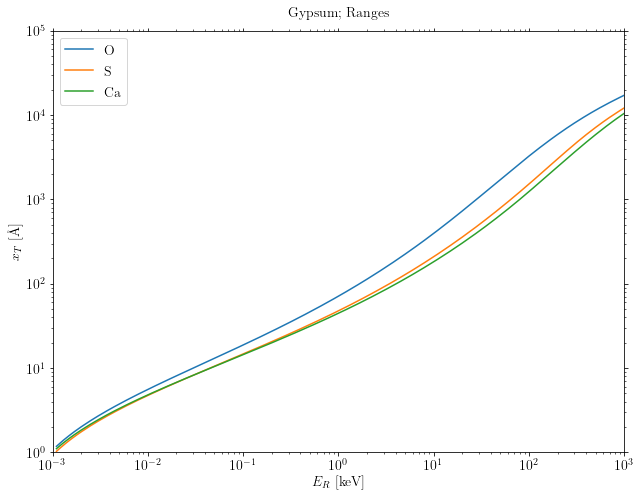

In [5]:
# plot ranges

ranges = SpecCalculator.Trange
element_names = SpecCalculator.TargetList.nameT_list

plt.close('all')
for i, name in enumerate(element_names):
    plt.plot(ranges[i][:,0], ranges[i][:,2], label=name)

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3,1e3)
plt.ylim(1e0,1e5)
plt.xlabel(r'$E_R$ [keV]')
plt.ylabel(r'$x_T$ [\AA]')
plt.legend()
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral+"; Ranges", y=1.02)
plt.tight_layout()
plt.show()

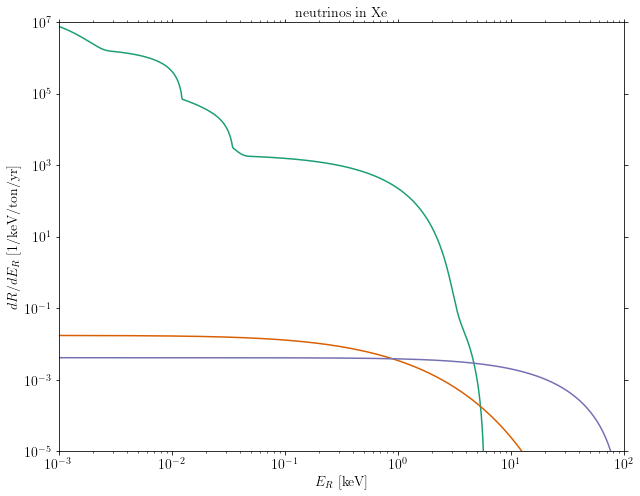

In [6]:
# reproduced fig 1, right of https://arxiv.org/abs/1604.03858
Xe_solar = CalcSpectra.BkgNeuSpec.dRdE_solar(120.,131.,54.,1.)
Xe_DSNB = CalcSpectra.BkgNeuSpec.dRdE_DSNB(120.,131.,54.,1.)
Xe_atm = CalcSpectra.BkgNeuSpec.dRdE_atm(120.,131.,54.,1.)

plt.close('all')
plt.plot(Xe_solar[0], 1e3*365*Xe_solar[1], color=plt_colors[1], label=r'solar $\nu$')
plt.plot(Xe_DSNB[0], 1e3*365*Xe_DSNB[1], color=plt_colors[2], label=r'DSNB $\nu$')
plt.plot(Xe_atm[0], 1e3*365*Xe_atm[1], color=plt_colors[3], label=r'atm. $\nu$')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3,1e2)
plt.ylim(1e-5,1e7)
plt.xlabel(r'$E_R$ [keV]')
plt.ylabel(r'$dR/dE_R$ [1/keV/ton/yr]')
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title('neutrinos in Xe')
plt.tight_layout()
plt.show()

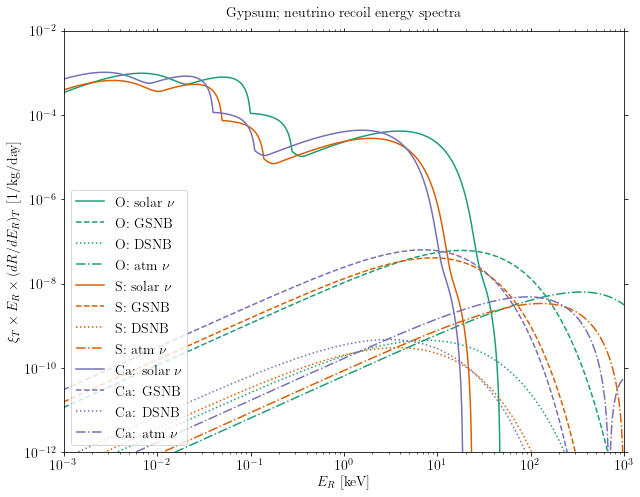

In [7]:
# plot the recoil energy spectra for the neutrino backgrounds
plt_linestyles = ['-', '--', ':', '-.']
plt.close('all')
for i, name in enumerate(SpecCalculator.TargetList.nameT_list):
    dRdE_nu_solar = CalcSpectra.BkgNeuSpec.dRdE_solar(
        SpecCalculator.TargetList.mT_list[i],
        SpecCalculator.TargetList.AT_list[i],
        SpecCalculator.TargetList.ZT_list[i],
        SpecCalculator.TargetList.massFrac_list[i]
    )
    dRdE_nu_GSNB = CalcSpectra.BkgNeuSpec.dRdE_GSNB(
        SpecCalculator.TargetList.mT_list[i],
        SpecCalculator.TargetList.AT_list[i],
        SpecCalculator.TargetList.ZT_list[i],
        SpecCalculator.TargetList.massFrac_list[i]
    )
    dRdE_nu_DSNB = CalcSpectra.BkgNeuSpec.dRdE_DSNB(
        SpecCalculator.TargetList.mT_list[i],
        SpecCalculator.TargetList.AT_list[i],
        SpecCalculator.TargetList.ZT_list[i],
        SpecCalculator.TargetList.massFrac_list[i]
    )
    dRdE_nu_atm = CalcSpectra.BkgNeuSpec.dRdE_atm(
        SpecCalculator.TargetList.mT_list[i],
        SpecCalculator.TargetList.AT_list[i],
        SpecCalculator.TargetList.ZT_list[i],
        SpecCalculator.TargetList.massFrac_list[i]
    )
    plt.plot(dRdE_nu_solar[0], dRdE_nu_solar[0]*dRdE_nu_solar[1], color=plt_colors[i+1], linestyle=plt_linestyles[0], label=name+r': solar $\nu$')
    plt.plot(dRdE_nu_GSNB[0], dRdE_nu_GSNB[0]*dRdE_nu_GSNB[1], color=plt_colors[i+1], linestyle=plt_linestyles[1], label=name+r': GSNB')
    plt.plot(dRdE_nu_DSNB[0], dRdE_nu_DSNB[0]*dRdE_nu_DSNB[1], color=plt_colors[i+1], linestyle=plt_linestyles[2], label=name+r': DSNB')
    plt.plot(dRdE_nu_atm[0], dRdE_nu_atm[0]*dRdE_nu_atm[1], color=plt_colors[i+1], linestyle=plt_linestyles[3], label=name+r': atm $\nu$')


plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3,1e3)
plt.ylim(1e-12,1e-2)
plt.xlabel(r'$E_R$ [keV]')
plt.ylabel(r'$\xi_T \times E_R \times (dR/dE_R)_T$ [1/kg/day]')
plt.legend(loc=3)
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral+'; neutrino recoil energy spectra', y=1.02)
plt.tight_layout()
plt.show()

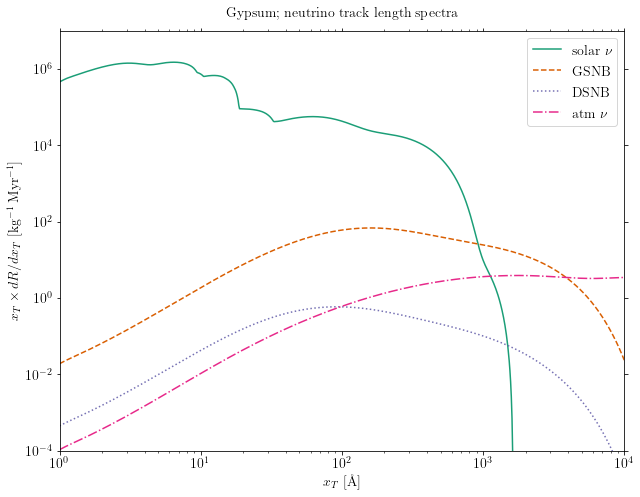

In [8]:
# plot the track length spectra for the neutrino backgrounds

bkg_nu_solar = SpecCalculator.calc_dRdx_BkgNeu_solar()
bkg_nu_GSNB = SpecCalculator.calc_dRdx_BkgNeu_GSNB()
bkg_nu_DSNB = SpecCalculator.calc_dRdx_BkgNeu_DSNB()
bkg_nu_atm = SpecCalculator.calc_dRdx_BkgNeu_atm()

plt.close('all')
plt.plot(bkg_nu_solar[0], bkg_nu_solar[0]*bkg_nu_solar[1], color=plt_colors[1], linestyle='-', label=r'solar $\nu$')
plt.plot(bkg_nu_GSNB[0], bkg_nu_GSNB[0]*bkg_nu_GSNB[1], color=plt_colors[2], linestyle='--', label=r'GSNB')
plt.plot(bkg_nu_DSNB[0], bkg_nu_DSNB[0]*bkg_nu_DSNB[1], color=plt_colors[3], linestyle=':', label=r'DSNB')
plt.plot(bkg_nu_atm[0], bkg_nu_atm[0]*bkg_nu_atm[1], color=plt_colors[4], linestyle='-.', label=r'atm $\nu$')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e4)
plt.ylim(1e-4,1e7)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'$x_T \times dR/dx_T$ [kg$^{-1}$\,Myr$^{-1}$]')
plt.legend()
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral+'; neutrino track length spectra', y=1.02)
plt.tight_layout()
plt.show()

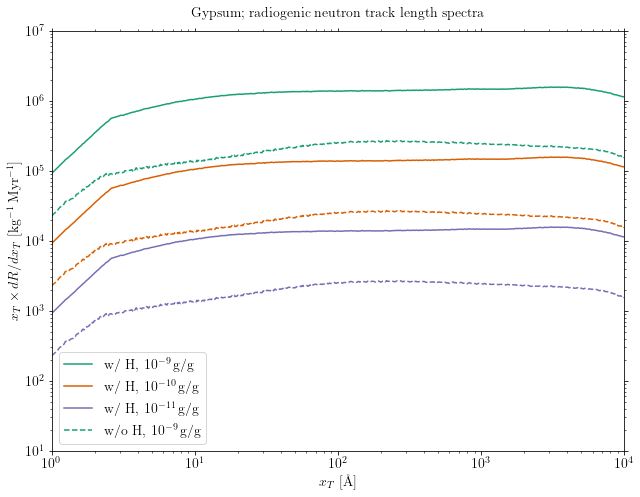

In [9]:
# plot the track length spectra for the neutron backgrounds

# w Hydrogen tracks
SpecCalculator = CalcSpectra.CalcSpectra(mineral, switch_keep_H=True)
bkg_rad_n_spec_wH_9 = SpecCalculator.calc_dRdx_Bkgn(1e-9)
bkg_rad_n_spec_wH_10 = SpecCalculator.calc_dRdx_Bkgn(1e-10)
bkg_rad_n_spec_wH_11 = SpecCalculator.calc_dRdx_Bkgn(1e-11)
# w/o Hydrogen tracks
SpecCalculator = CalcSpectra.CalcSpectra(mineral, switch_keep_H=False)
bkg_rad_n_spec_woH_9 = SpecCalculator.calc_dRdx_Bkgn(1e-9)
bkg_rad_n_spec_woH_10 = SpecCalculator.calc_dRdx_Bkgn(1e-10)
bkg_rad_n_spec_woH_11 = SpecCalculator.calc_dRdx_Bkgn(1e-11)
# reset SpecCalculator
SpecCalculator = CalcSpectra.CalcSpectra(mineral, switch_keep_H=switch_keep_H)

plt.close('all')
plt.plot(bkg_rad_n_spec_wH_9[0], bkg_rad_n_spec_wH_9[0]*bkg_rad_n_spec_wH_9[1], color=plt_colors[1], linestyle='-', label=r'w/ H, $10^{-9}\,$g/g')
plt.plot(bkg_rad_n_spec_wH_10[0], bkg_rad_n_spec_wH_10[0]*bkg_rad_n_spec_wH_10[1], color=plt_colors[2], linestyle='-', label=r'w/ H, $10^{-10}\,$g/g')
plt.plot(bkg_rad_n_spec_wH_11[0], bkg_rad_n_spec_wH_11[0]*bkg_rad_n_spec_wH_11[1], color=plt_colors[3], linestyle='-', label=r'w/ H, $10^{-11}\,$g/g')
plt.plot(bkg_rad_n_spec_woH_9[0], bkg_rad_n_spec_woH_9[0]*bkg_rad_n_spec_woH_9[1], color=plt_colors[1], linestyle='--', label=r'w/o H, $10^{-9}\,$g/g')
plt.plot(bkg_rad_n_spec_woH_10[0], bkg_rad_n_spec_woH_10[0]*bkg_rad_n_spec_woH_10[1], color=plt_colors[2], linestyle='--')
plt.plot(bkg_rad_n_spec_woH_11[0], bkg_rad_n_spec_woH_11[0]*bkg_rad_n_spec_woH_11[1], color=plt_colors[3], linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e4)
plt.ylim(1e1,1e7)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'$x_T \times dR/dx_T$ [kg$^{-1}$\,Myr$^{-1}$]')
plt.legend()
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral+'; radiogenic neutron track length spectra', y=1.02)
plt.tight_layout()
plt.show()

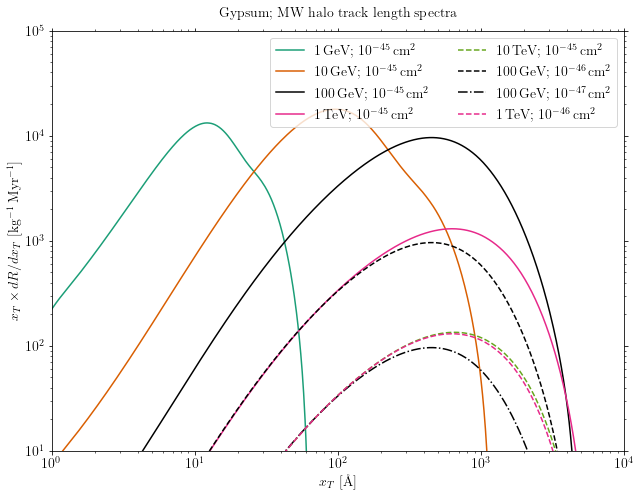

In [10]:
# plot some MW halo track length spectra
MW_spec_1 = SpecCalculator.calc_dRdx_MW(1., 1e-45)      
MW_spec_2 = SpecCalculator.calc_dRdx_MW(10., 1e-45)
MW_spec_3 = SpecCalculator.calc_dRdx_MW(100., 1e-45)
MW_spec_4 = SpecCalculator.calc_dRdx_MW(1000., 1e-45)
MW_spec_5 = SpecCalculator.calc_dRdx_MW(10000., 1e-45)
MW_spec_6 = SpecCalculator.calc_dRdx_MW(100., 1e-46)
MW_spec_7 = SpecCalculator.calc_dRdx_MW(100., 1e-47)
MW_spec_8 = SpecCalculator.calc_dRdx_MW(1000., 1e-46)

plt.plot(MW_spec_1[0], MW_spec_1[0]*MW_spec_1[1], color=plt_colors[1], linestyle='-', label=r'1\,GeV; $10^{-45}$\,cm$^2$')
plt.plot(MW_spec_2[0], MW_spec_2[0]*MW_spec_2[1], color=plt_colors[2], linestyle='-', label=r'10\,GeV; $10^{-45}$\,cm$^2$')
plt.plot(MW_spec_3[0], MW_spec_3[0]*MW_spec_3[1], color=plt_colors[0], linestyle='-', label=r'100\,GeV; $10^{-45}$\,cm$^2$')
plt.plot(MW_spec_4[0], MW_spec_4[0]*MW_spec_4[1], color=plt_colors[4], linestyle='-', label=r'1\,TeV; $10^{-45}$\,cm$^2$')
plt.plot(MW_spec_5[0], MW_spec_5[0]*MW_spec_5[1], color=plt_colors[5], linestyle='--', label=r'10\,TeV; $10^{-45}$\,cm$^2$')
plt.plot(MW_spec_6[0], MW_spec_6[0]*MW_spec_6[1], color=plt_colors[0], linestyle='--', label=r'100\,GeV; $10^{-46}$\,cm$^2$')
plt.plot(MW_spec_7[0], MW_spec_7[0]*MW_spec_7[1], color=plt_colors[0], linestyle='-.', label=r'100\,GeV; $10^{-47}$\,cm$^2$')
plt.plot(MW_spec_8[0], MW_spec_8[0]*MW_spec_8[1], color=plt_colors[4], linestyle='--', label=r'1\,TeV; $10^{-46}$\,cm$^2$')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e4)
plt.ylim(1e1,1e5)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'$x_T \times dR/dx_T$ [kg$^{-1}$\,Myr$^{-1}$]')
plt.legend(ncol=2)
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral+'; MW halo track length spectra', y=1.02)
plt.tight_layout()
plt.show()

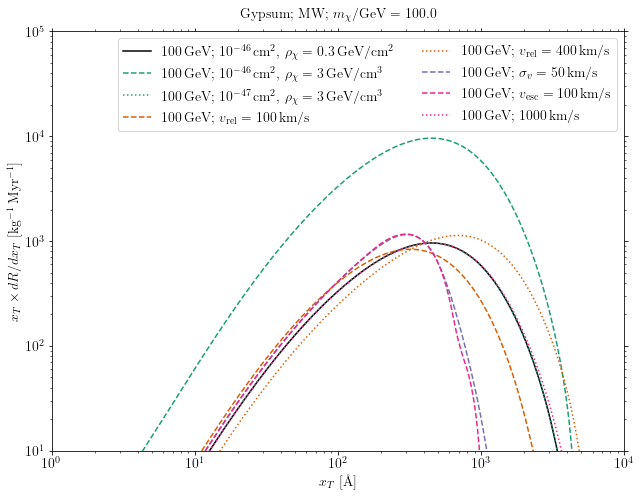

In [11]:
# plot some more MW halo track length spectra
mx = 100.
MW_spec_1 = SpecCalculator.calc_dRdx_MW(mx, 1e-46)
MW_spec_2 = SpecCalculator.calc_dRdx_MW(mx, 1e-46, rhoDM=3.)
MW_spec_3 = SpecCalculator.calc_dRdx_MW(mx, 1e-47, rhoDM=3.)
MW_spec_4 = SpecCalculator.calc_dRdx_MW(mx, 1e-46, vrel=100.)
MW_spec_5 = SpecCalculator.calc_dRdx_MW(mx, 1e-46, vrel=400.)
MW_spec_6 = SpecCalculator.calc_dRdx_MW(mx, 1e-46, sigv=50.)
MW_spec_7 = SpecCalculator.calc_dRdx_MW(mx, 1e-46, vesc=100.)
MW_spec_8 = SpecCalculator.calc_dRdx_MW(mx, 1e-46, vesc=1000.)

plt.close('all')
plt.plot(MW_spec_1[0], MW_spec_1[0]*MW_spec_1[1], color=plt_colors[0], linestyle='-', label=str(int(mx))+r'\,GeV; $10^{-46}$\,cm$^2$, $\rho_\chi = 0.3\,$GeV/cm$^2$')
plt.plot(MW_spec_2[0], MW_spec_2[0]*MW_spec_2[1], color=plt_colors[1], linestyle='--', label=str(int(mx))+r'\,GeV; $10^{-46}$\,cm$^2$,  $\rho_\chi = 3\,$GeV/cm$^3$')
plt.plot(MW_spec_3[0], MW_spec_3[0]*MW_spec_3[1], color=plt_colors[1], linestyle=':', label=str(int(mx))+r'\,GeV; $10^{-47}$\,cm$^2$,  $\rho_\chi = 3\,$GeV/cm$^3$')
plt.plot(MW_spec_4[0], MW_spec_4[0]*MW_spec_4[1], color=plt_colors[2], linestyle='--', label=str(int(mx))+r'\,GeV; $v_{\rm rel} = 100\,$km/s')
plt.plot(MW_spec_5[0], MW_spec_5[0]*MW_spec_5[1], color=plt_colors[2], linestyle=':', label=str(int(mx))+r'\,GeV; $v_{\rm rel} = 400\,$km/s')
plt.plot(MW_spec_6[0], MW_spec_6[0]*MW_spec_6[1], color=plt_colors[3], linestyle='--', label=str(int(mx))+r'\,GeV; $\sigma_v = 50\,$km/s')
plt.plot(MW_spec_7[0], MW_spec_7[0]*MW_spec_7[1], color=plt_colors[4], linestyle='--', label=str(int(mx))+r'\,GeV; $v_{\rm esc} = 100\,$km/s')
plt.plot(MW_spec_8[0], MW_spec_8[0]*MW_spec_8[1], color=plt_colors[4], linestyle=':', label=str(int(mx))+r'\,GeV; $1000\,$km/s')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e4)
plt.ylim(1e1,1e5)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'$x_T \times dR/dx_T$ [kg$^{-1}$\,Myr$^{-1}$]')
plt.legend(ncol=2)
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral+r'; MW; $m_\chi$/GeV = '+str(mx), y=1.02)
plt.tight_layout()
plt.show()

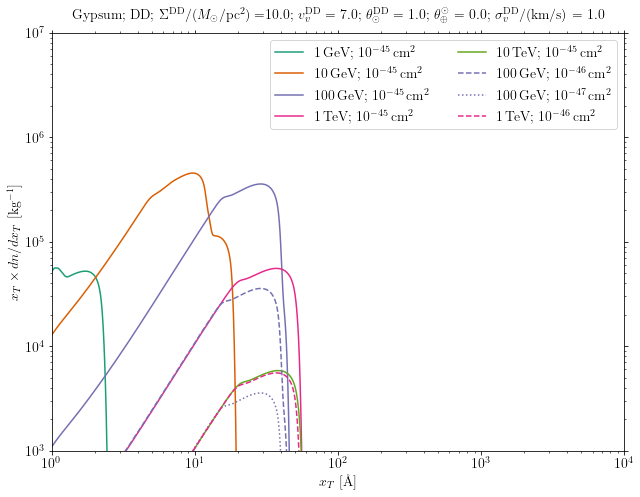

In [12]:
# plot some dark disk spectra
SigDD = 10.
vvDD = 7.
thetavDD = 1.
thetaorbitDD = 0.
sigvDD = 1.
DD_spec_1 = SpecCalculator.calc_dndx_DD(1., 1e-45, SigDD, vvDD,  thetavDD, thetaorbitDD, sigvDD)
DD_spec_2 = SpecCalculator.calc_dndx_DD(10., 1e-45, SigDD, vvDD,  thetavDD, thetaorbitDD, sigvDD)
DD_spec_3 = SpecCalculator.calc_dndx_DD(100., 1e-45, SigDD, vvDD,  thetavDD, thetaorbitDD, sigvDD)
DD_spec_4 = SpecCalculator.calc_dndx_DD(1000., 1e-45, SigDD, vvDD,  thetavDD, thetaorbitDD, sigvDD)
DD_spec_5 = SpecCalculator.calc_dndx_DD(10000., 1e-45, SigDD, vvDD,  thetavDD, thetaorbitDD, sigvDD)
DD_spec_6 = SpecCalculator.calc_dndx_DD(100., 1e-46, SigDD, vvDD,  thetavDD, thetaorbitDD, sigvDD)
DD_spec_7 = SpecCalculator.calc_dndx_DD(100., 1e-47, SigDD, vvDD,  thetavDD, thetaorbitDD, sigvDD)
DD_spec_8 = SpecCalculator.calc_dndx_DD(1000., 1e-46, SigDD, vvDD,  thetavDD, thetaorbitDD, sigvDD)

plt.close('all')
plt.plot(DD_spec_1[0], DD_spec_1[0]*DD_spec_1[1], color=plt_colors[1], linestyle='-', label=r'1\,GeV; $10^{-45}\,{\rm cm}^2$')
plt.plot(DD_spec_2[0], DD_spec_2[0]*DD_spec_2[1], color=plt_colors[2], linestyle='-', label=r'10\,GeV; $10^{-45}\,{\rm cm}^2$')
plt.plot(DD_spec_3[0], DD_spec_3[0]*DD_spec_3[1], color=plt_colors[3], linestyle='-', label=r'100\,GeV; $10^{-45}\,{\rm cm}^2$')
plt.plot(DD_spec_4[0], DD_spec_4[0]*DD_spec_4[1], color=plt_colors[4], linestyle='-', label=r'1\,TeV; $10^{-45}\,{\rm cm}^2$')
plt.plot(DD_spec_5[0], DD_spec_5[0]*DD_spec_5[1], color=plt_colors[5], linestyle='-', label=r'10\,TeV; $10^{-45}\,{\rm cm}^2$')
plt.plot(DD_spec_6[0], DD_spec_6[0]*DD_spec_6[1], color=plt_colors[3], linestyle='--', label=r'100\,GeV; $10^{-46}\,{\rm cm}^2$')
plt.plot(DD_spec_7[0], DD_spec_7[0]*DD_spec_7[1], color=plt_colors[3], linestyle=':', label=r'100\,GeV; $10^{-47}\,{\rm cm}^2$')
plt.plot(DD_spec_8[0], DD_spec_8[0]*DD_spec_8[1], color=plt_colors[4], linestyle='--', label=r'1\,TeV; $10^{-46}\,{\rm cm}^2$')
         
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e4)
plt.ylim(1e3,1e7)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'$x_T \times dn/dx_T$ [kg$^{-1}$]')
plt.legend(ncol=2)
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral+r'; DD'
   +r'; $\Sigma^{\rm DD}/(M_\odot/{\rm pc}^2) = $'+str(SigDD)
   +r'; $v_v^{\rm DD}$ = '+str(vvDD)
   +r'; $\theta_\odot^{\rm DD}$ = '+str(thetavDD)
   +r'; $\theta_\oplus^\odot$ = '+str(thetaorbitDD)
   +r'; $\sigma_v^{\rm DD}$/(km/s) = '+str(sigvDD),
   y=1.02)
plt.tight_layout()
plt.show()

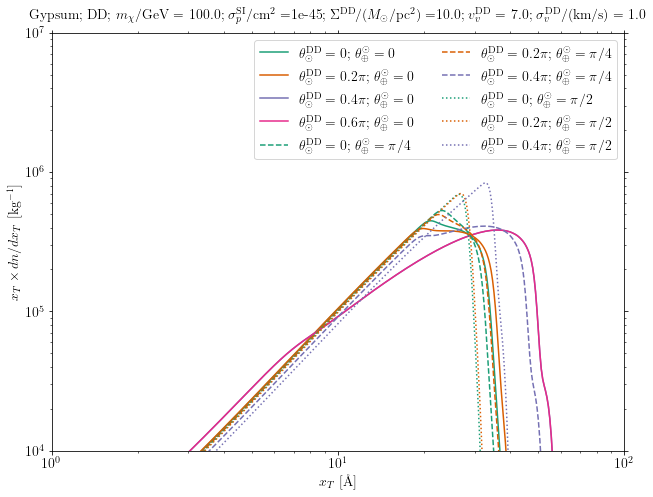

In [13]:
# plot some more dark disk spectra
mx = 100.
xsec = 1e-45
SigDD = 10.
vvDD = 7.
sigvDD = 1.
DD_spec_1 = SpecCalculator.calc_dndx_DD(mx, xsec, SigDD, vvDD,  0.*np.pi, 0.*np.pi, sigvDD)
DD_spec_2 = SpecCalculator.calc_dndx_DD(mx, xsec, SigDD, vvDD,  0.2*np.pi, 0.*np.pi, sigvDD)
DD_spec_3 = SpecCalculator.calc_dndx_DD(mx, xsec, SigDD, vvDD,  0.4*np.pi, 0.*np.pi, sigvDD)
DD_spec_4 = SpecCalculator.calc_dndx_DD(mx, xsec, SigDD, vvDD,  0.6*np.pi, 0.*np.pi, sigvDD)
DD_spec_5 = SpecCalculator.calc_dndx_DD(mx, xsec, SigDD, vvDD,  0.*np.pi, 0.25*np.pi, sigvDD)
DD_spec_6 = SpecCalculator.calc_dndx_DD(mx, xsec, SigDD, vvDD,  0.2*np.pi, 0.25*np.pi, sigvDD)
DD_spec_7 = SpecCalculator.calc_dndx_DD(mx, xsec, SigDD, vvDD,  0.4*np.pi, 0.25*np.pi, sigvDD)
DD_spec_8 = SpecCalculator.calc_dndx_DD(mx, xsec, SigDD, vvDD,  0.*np.pi, 0.5*np.pi, sigvDD)
DD_spec_9 = SpecCalculator.calc_dndx_DD(mx, xsec, SigDD, vvDD,  0.2*np.pi, 0.5*np.pi, sigvDD)
DD_spec_10 = SpecCalculator.calc_dndx_DD(mx, xsec, SigDD, vvDD,  0.4*np.pi, 0.5*np.pi, sigvDD)

plt.close('all')
plt.plot(DD_spec_1[0], DD_spec_1[0]*DD_spec_1[1], color=plt_colors[1], linestyle='-', label=r'$\theta_\odot^{\rm DD} = 0$; $\theta_\oplus^\odot = 0$')
plt.plot(DD_spec_2[0], DD_spec_2[0]*DD_spec_2[1], color=plt_colors[2], linestyle='-', label=r'$\theta_\odot^{\rm DD} = 0.2\pi$; $\theta_\oplus^\odot = 0$')
plt.plot(DD_spec_3[0], DD_spec_3[0]*DD_spec_3[1], color=plt_colors[3], linestyle='-', label=r'$\theta_\odot^{\rm DD} = 0.4\pi$; $\theta_\oplus^\odot = 0$')
plt.plot(DD_spec_4[0], DD_spec_4[0]*DD_spec_4[1], color=plt_colors[4], linestyle='-', label=r'$\theta_\odot^{\rm DD} = 0.6\pi$; $\theta_\oplus^\odot = 0$')
plt.plot(DD_spec_5[0], DD_spec_5[0]*DD_spec_5[1], color=plt_colors[1], linestyle='--', label=r'$\theta_\odot^{\rm DD} = 0$; $\theta_\oplus^\odot = \pi/4$')
plt.plot(DD_spec_6[0], DD_spec_6[0]*DD_spec_6[1], color=plt_colors[2], linestyle='--', label=r'$\theta_\odot^{\rm DD} = 0.2\pi$; $\theta_\oplus^\odot = \pi/4$')
plt.plot(DD_spec_7[0], DD_spec_7[0]*DD_spec_7[1], color=plt_colors[3], linestyle='--', label=r'$\theta_\odot^{\rm DD} = 0.4\pi$; $\theta_\oplus^\odot = \pi/4$')
plt.plot(DD_spec_8[0], DD_spec_8[0]*DD_spec_8[1], color=plt_colors[1], linestyle=':', label=r'$\theta_\odot^{\rm DD} = 0$; $\theta_\oplus^\odot = \pi/2$')
plt.plot(DD_spec_9[0], DD_spec_9[0]*DD_spec_9[1], color=plt_colors[2], linestyle=':', label=r'$\theta_\odot^{\rm DD} = 0.2\pi$; $\theta_\oplus^\odot = \pi/2$')
plt.plot(DD_spec_10[0], DD_spec_10[0]*DD_spec_10[1], color=plt_colors[3], linestyle=':', label=r'$\theta_\odot^{\rm DD} = 0.4\pi$; $\theta_\oplus^\odot = \pi/2$')
          
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e2)
plt.ylim(1e4,1e7)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'$x_T \times dn/dx_T$ [kg$^{-1}$]')
plt.legend(ncol=2)
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral+r'; DD'
   +r'; $m_\chi$/GeV = '+str(mx)
   +r'; $\sigma_p^{\rm SI}/{\rm cm^2} = $'+str(xsec)
   +r'; $\Sigma^{\rm DD}/(M_\odot/{\rm pc}^2) = $'+str(SigDD)
   +r'; $v_v^{\rm DD}$ = '+str(vvDD)
   +r'; $\sigma_v^{\rm DD}$/(km/s) = '+str(sigvDD),
   y=1.02)
plt.tight_layout()
plt.show()

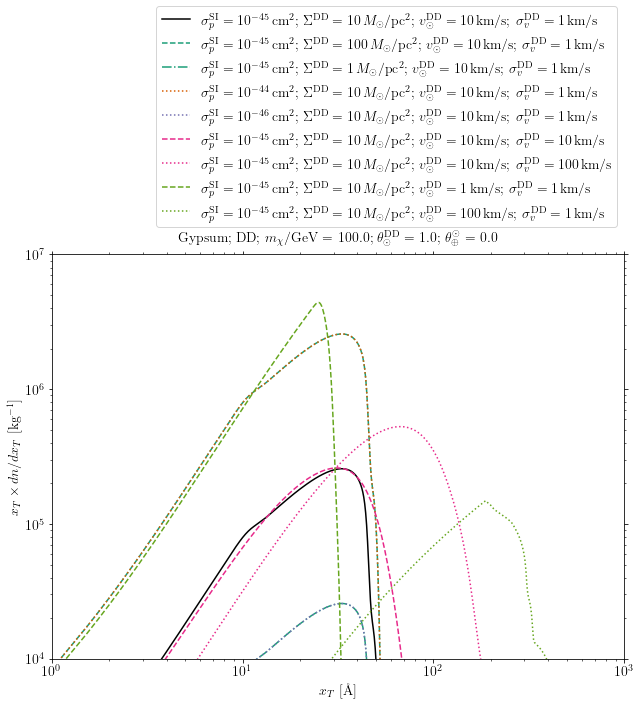

In [14]:
# plot even more dark disk spectra
mx = 100.
thetavDD = 1.
thetaorbitDD = 0.
DD_spec_1 = SpecCalculator.calc_dndx_DD(mx, 1e-45, 10., 10., thetavDD, thetaorbitDD, 1.)
DD_spec_2 = SpecCalculator.calc_dndx_DD(mx, 1e-45, 100., 10., thetavDD, thetaorbitDD, 1.)
DD_spec_3 = SpecCalculator.calc_dndx_DD(mx, 1e-45, 1., 10., thetavDD, thetaorbitDD, 1.)
DD_spec_4 = SpecCalculator.calc_dndx_DD(mx, 1e-44, 10., 10., thetavDD, thetaorbitDD, 1.)
DD_spec_5 = SpecCalculator.calc_dndx_DD(mx, 1e-46, 10., 10., thetavDD, thetaorbitDD, 1.)
DD_spec_6 = SpecCalculator.calc_dndx_DD(mx, 1e-45, 10., 10., thetavDD, thetaorbitDD, 10.)
DD_spec_7 = SpecCalculator.calc_dndx_DD(mx, 1e-45, 10., 10., thetavDD, thetaorbitDD, 100.)
DD_spec_8 = SpecCalculator.calc_dndx_DD(mx, 1e-45, 10., 1., thetavDD, thetaorbitDD, 1.)
DD_spec_9 = SpecCalculator.calc_dndx_DD(mx, 1e-45, 10., 100., thetavDD, thetaorbitDD, 1.)

plt.rcParams["figure.figsize"] = (9,10)
plt.close('all')
plt.plot(DD_spec_1[0], DD_spec_1[0]*DD_spec_1[1], color=plt_colors[0], linestyle='-', label=r'$\sigma_p^{\rm SI} = 10^{-45}\,$cm$^2$; $\Sigma^{\rm DD} = 10\,M_\odot/{\rm pc}^2$; $v_\odot^{\rm DD} = 10\,$km/s; $\sigma_v^{\rm DD} = 1\,$km/s')
plt.plot(DD_spec_2[0], DD_spec_2[0]*DD_spec_2[1], color=plt_colors[1], linestyle='--', label=r'$\sigma_p^{\rm SI} = 10^{-45}\,$cm$^2$; $\Sigma^{\rm DD} = 100\,M_\odot/{\rm pc}^2$; $v_\odot^{\rm DD} = 10\,$km/s; $\sigma_v^{\rm DD} = 1\,$km/s')
plt.plot(DD_spec_3[0], DD_spec_3[0]*DD_spec_3[1], color=plt_colors[1], linestyle='-.', label=r'$\sigma_p^{\rm SI} = 10^{-45}\,$cm$^2$; $\Sigma^{\rm DD} = 1\,M_\odot/{\rm pc}^2$; $v_\odot^{\rm DD} = 10\,$km/s; $\sigma_v^{\rm DD} = 1\,$km/s')
plt.plot(DD_spec_4[0], DD_spec_4[0]*DD_spec_4[1], color=plt_colors[2], linestyle=':', label=r'$\sigma_p^{\rm SI} = 10^{-44}\,$cm$^2$; $\Sigma^{\rm DD} = 10\,M_\odot/{\rm pc}^2$; $v_\odot^{\rm DD} = 10\,$km/s; $\sigma_v^{\rm DD} = 1\,$km/s')
plt.plot(DD_spec_5[0], DD_spec_5[0]*DD_spec_5[1], color=plt_colors[3], linestyle=':', label=r'$\sigma_p^{\rm SI} = 10^{-46}\,$cm$^2$; $\Sigma^{\rm DD} = 10\,M_\odot/{\rm pc}^2$; $v_\odot^{\rm DD} = 10\,$km/s; $\sigma_v^{\rm DD} = 1\,$km/s')
plt.plot(DD_spec_6[0], DD_spec_6[0]*DD_spec_6[1], color=plt_colors[4], linestyle='--', label=r'$\sigma_p^{\rm SI} = 10^{-45}\,$cm$^2$; $\Sigma^{\rm DD} = 10\,M_\odot/{\rm pc}^2$; $v_\odot^{\rm DD} = 10\,$km/s; $\sigma_v^{\rm DD} = 10\,$km/s')
plt.plot(DD_spec_7[0], DD_spec_7[0]*DD_spec_7[1], color=plt_colors[4], linestyle=':', label=r'$\sigma_p^{\rm SI} = 10^{-45}\,$cm$^2$; $\Sigma^{\rm DD} = 10\,M_\odot/{\rm pc}^2$; $v_\odot^{\rm DD} = 10\,$km/s; $\sigma_v^{\rm DD} = 100\,$km/s')
plt.plot(DD_spec_8[0], DD_spec_8[0]*DD_spec_8[1], color=plt_colors[5], linestyle='--', label=r'$\sigma_p^{\rm SI} = 10^{-45}\,$cm$^2$; $\Sigma^{\rm DD} = 10\,M_\odot/{\rm pc}^2$; $v_\odot^{\rm DD} = 1\,$km/s; $\sigma_v^{\rm DD} = 1\,$km/s')
plt.plot(DD_spec_9[0], DD_spec_9[0]*DD_spec_9[1], color=plt_colors[5], linestyle=':', label=r'$\sigma_p^{\rm SI} = 10^{-45}\,$cm$^2$; $\Sigma^{\rm DD} = 10\,M_\odot/{\rm pc}^2$; $v_\odot^{\rm DD} = 100\,$km/s; $\sigma_v^{\rm DD} = 1\,$km/s')
   
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e3)
plt.ylim(1e4,1e7)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'$x_T \times dn/dx_T$ [kg$^{-1}$]')
plt.legend(ncol=1, loc=4, bbox_to_anchor=(1,1.05))
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral+r'; DD'
   +r'; $m_\chi$/GeV = '+str(mx)
   +r'; $\theta_\odot^{\rm DD}$ = '+str(thetavDD)
   +r'; $\theta_\oplus^\odot$ = '+str(thetaorbitDD),
   y=1.02)
plt.tight_layout()
plt.show()
plt.rcParams["figure.figsize"] = (9,7)

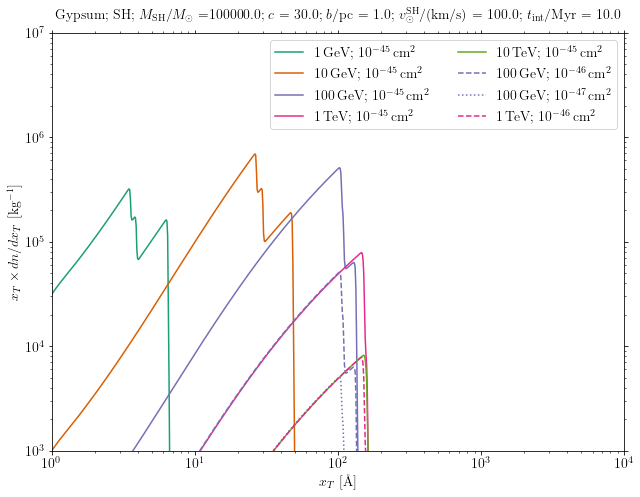

In [15]:
# plot some subhalo spectra
Msh = 1e5
c=30.
b=1.
vsh=100.
tint=10.
SH_spec_1 = SpecCalculator.calc_dndx_sh(1., 1e-45, Msh, c, b, vsh, -tint/2., tint/2.)
SH_spec_2 = SpecCalculator.calc_dndx_sh(10., 1e-45, Msh, c, b, vsh, -tint/2., tint/2.)
SH_spec_3 = SpecCalculator.calc_dndx_sh(100., 1e-45, Msh, c, b, vsh, -tint/2., tint/2.)
SH_spec_4 = SpecCalculator.calc_dndx_sh(1000., 1e-45, Msh, c, b, vsh, -tint/2., tint/2.)
SH_spec_5 = SpecCalculator.calc_dndx_sh(10000., 1e-45, Msh, c, b, vsh, -tint/2., tint/2.)
SH_spec_6 = SpecCalculator.calc_dndx_sh(100., 1e-46, Msh, c, b, vsh, -tint/2., tint/2.)
SH_spec_7 = SpecCalculator.calc_dndx_sh(100., 1e-47, Msh, c, b, vsh, -tint/2., tint/2.)
SH_spec_8 = SpecCalculator.calc_dndx_sh(1000., 1e-46, Msh, c, b, vsh, -tint/2., tint/2.)

plt.close('all')
plt.plot(SH_spec_1[0], SH_spec_1[0]*SH_spec_1[1], color=plt_colors[1], linestyle='-', label=r'1\,GeV; $10^{-45}\,{\rm cm}^2$')
plt.plot(SH_spec_2[0], SH_spec_2[0]*SH_spec_2[1], color=plt_colors[2], linestyle='-', label=r'10\,GeV; $10^{-45}\,{\rm cm}^2$')
plt.plot(SH_spec_3[0], SH_spec_3[0]*SH_spec_3[1], color=plt_colors[3], linestyle='-', label=r'100\,GeV; $10^{-45}\,{\rm cm}^2$')
plt.plot(SH_spec_4[0], SH_spec_4[0]*SH_spec_4[1], color=plt_colors[4], linestyle='-', label=r'1\,TeV; $10^{-45}\,{\rm cm}^2$')
plt.plot(SH_spec_5[0], SH_spec_5[0]*SH_spec_5[1], color=plt_colors[5], linestyle='-', label=r'10\,TeV; $10^{-45}\,{\rm cm}^2$')
plt.plot(SH_spec_6[0], SH_spec_6[0]*SH_spec_6[1], color=plt_colors[3], linestyle='--', label=r'100\,GeV; $10^{-46}\,{\rm cm}^2$')
plt.plot(SH_spec_7[0], SH_spec_7[0]*SH_spec_7[1], color=plt_colors[3], linestyle=':', label=r'100\,GeV; $10^{-47}\,{\rm cm}^2$')
plt.plot(SH_spec_8[0], SH_spec_8[0]*SH_spec_8[1], color=plt_colors[4], linestyle='--', label=r'1\,TeV; $10^{-46}\,{\rm cm}^2$')
         
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e4)
plt.ylim(1e3,1e7)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'$x_T \times dn/dx_T$ [kg$^{-1}$]')
plt.legend(ncol=2)
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral+r'; SH'
   +r'; $M_{\rm SH}/M_\odot = $'+str(Msh)
   +r'; $c$ = '+str(c)
   +r'; $b$/pc = '+str(b)
   +r'; $v_\odot^{\rm SH}$/(km/s) = '+str(vsh)
   +r'; $t_{\rm int}$/Myr = '+str(tint),
   y=1.02)
plt.tight_layout()
plt.show()

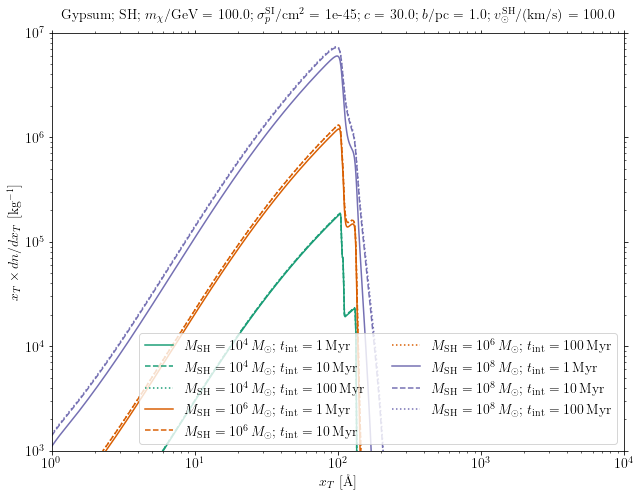

In [16]:
# plot some more subhalo spectra
mx = 100.
xsec = 1e-45
c=30.
b=1.
vsh=100.
SH_spec_1 = SpecCalculator.calc_dndx_sh(mx, xsec, 1e4, c, b, vsh, -1./2., 1./2.)
SH_spec_2 = SpecCalculator.calc_dndx_sh(mx, xsec, 1e4, c, b, vsh, -10./2., 10./2.)
SH_spec_3 = SpecCalculator.calc_dndx_sh(mx, xsec, 1e4, c, b, vsh, -100./2., 100./2.)
SH_spec_4 = SpecCalculator.calc_dndx_sh(mx, xsec, 1e6, c, b, vsh, -1./2., 1./2.)
SH_spec_5 = SpecCalculator.calc_dndx_sh(mx, xsec, 1e6, c, b, vsh, -10./2., 10./2.)
SH_spec_6 = SpecCalculator.calc_dndx_sh(mx, xsec, 1e6, c, b, vsh, -100./2., 100./2.)
SH_spec_7 = SpecCalculator.calc_dndx_sh(mx, xsec, 1e8, c, b, vsh, -1./2., 1./2.)
SH_spec_8 = SpecCalculator.calc_dndx_sh(mx, xsec, 1e8, c, b, vsh, -10./2., 10./2.)
SH_spec_9 = SpecCalculator.calc_dndx_sh(mx, xsec, 1e8, c, b, vsh, -100./2., 100./2.)

plt.close('all')
plt.plot(SH_spec_1[0], SH_spec_1[0]*SH_spec_1[1], color=plt_colors[1], linestyle='-', label=r'$M_{\rm SH} = 10^4\,M_\odot$; $t_{\rm int} = 1\,$Myr')
plt.plot(SH_spec_2[0], SH_spec_2[0]*SH_spec_2[1], color=plt_colors[1], linestyle='--', label=r'$M_{\rm SH} = 10^4\,M_\odot$; $t_{\rm int} = 10\,$Myr')
plt.plot(SH_spec_3[0], SH_spec_3[0]*SH_spec_3[1], color=plt_colors[1], linestyle=':', label=r'$M_{\rm SH} = 10^4\,M_\odot$; $t_{\rm int} = 100\,$Myr')
plt.plot(SH_spec_4[0], SH_spec_4[0]*SH_spec_4[1], color=plt_colors[2], linestyle='-', label=r'$M_{\rm SH} = 10^6\,M_\odot$; $t_{\rm int} = 1\,$Myr')
plt.plot(SH_spec_5[0], SH_spec_5[0]*SH_spec_5[1], color=plt_colors[2], linestyle='--', label=r'$M_{\rm SH} = 10^6\,M_\odot$; $t_{\rm int} = 10\,$Myr')
plt.plot(SH_spec_6[0], SH_spec_6[0]*SH_spec_6[1], color=plt_colors[2], linestyle=':', label=r'$M_{\rm SH} = 10^6\,M_\odot$; $t_{\rm int} = 100\,$Myr')
plt.plot(SH_spec_7[0], SH_spec_7[0]*SH_spec_7[1], color=plt_colors[3], linestyle='-', label=r'$M_{\rm SH} = 10^8\,M_\odot$; $t_{\rm int} = 1\,$Myr')
plt.plot(SH_spec_8[0], SH_spec_8[0]*SH_spec_8[1], color=plt_colors[3], linestyle='--', label=r'$M_{\rm SH} = 10^8\,M_\odot$; $t_{\rm int} = 10\,$Myr')
plt.plot(SH_spec_9[0], SH_spec_9[0]*SH_spec_9[1], color=plt_colors[3], linestyle=':', label=r'$M_{\rm SH} = 10^8\,M_\odot$; $t_{\rm int} = 100\,$Myr')  
    
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e4)
plt.ylim(1e3,1e7)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'$x_T \times dn/dx_T$ [kg$^{-1}$]')
plt.legend(ncol=2)
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral+r'; SH'
   +r'; $m_\chi/$GeV = '+str(mx)
   +r'; $\sigma_p^{\rm SI}$/cm$^2$ = '+str(xsec)
   +r'; $c$ = '+str(c)
   +r'; $b$/pc = '+str(b)
   +r'; $v_\odot^{\rm SH}$/(km/s) = '+str(vsh),
   y=1.02)
plt.tight_layout()
plt.show()

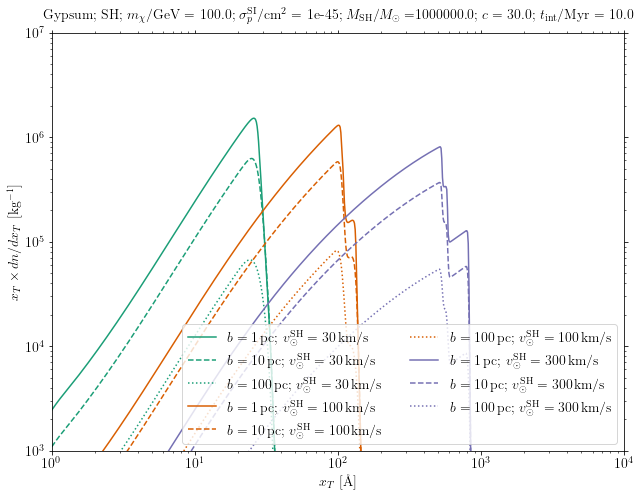

In [17]:
# plot even more subhalo spectra
mx = 100.
xsec = 1e-45
Msh = 1e6
c=30.
tint = 10.
SH_spec_1 = SpecCalculator.calc_dndx_sh(mx, xsec, Msh, c, 1., 30., -tint/2., tint/2.)
SH_spec_2 = SpecCalculator.calc_dndx_sh(mx, xsec, Msh, c, 10., 30., -tint/2., tint/2.)
SH_spec_3 = SpecCalculator.calc_dndx_sh(mx, xsec, Msh, c, 100., 30., -tint/2., tint/2.)
SH_spec_4 = SpecCalculator.calc_dndx_sh(mx, xsec, Msh, c, 1., 100., -tint/2., tint/2.)
SH_spec_5 = SpecCalculator.calc_dndx_sh(mx, xsec, Msh, c, 10., 100., -tint/2., tint/2.)
SH_spec_6 = SpecCalculator.calc_dndx_sh(mx, xsec, Msh, c, 100., 100., -tint/2., tint/2.)
SH_spec_7 = SpecCalculator.calc_dndx_sh(mx, xsec, Msh, c, 1., 300., -tint/2., tint/2.)
SH_spec_8 = SpecCalculator.calc_dndx_sh(mx, xsec, Msh, c, 10., 300., -tint/2., tint/2.)
SH_spec_9 = SpecCalculator.calc_dndx_sh(mx, xsec, Msh, c, 100., 300., -tint/2., tint/2.)

plt.close('all')
plt.plot(SH_spec_1[0], SH_spec_1[0]*SH_spec_1[1], color=plt_colors[1], linestyle='-', label=r'$b = 1\,$pc; $v_\odot^{\rm SH} = 30\,$km/s')
plt.plot(SH_spec_2[0], SH_spec_2[0]*SH_spec_2[1], color=plt_colors[1], linestyle='--', label=r'$b = 10\,$pc; $v_\odot^{\rm SH} = 30\,$km/s')
plt.plot(SH_spec_3[0], SH_spec_3[0]*SH_spec_3[1], color=plt_colors[1], linestyle=':', label=r'$b = 100\,$pc; $v_\odot^{\rm SH} = 30\,$km/s')
plt.plot(SH_spec_4[0], SH_spec_4[0]*SH_spec_4[1], color=plt_colors[2], linestyle='-', label=r'$b = 1\,$pc; $v_\odot^{\rm SH} = 100\,$km/s')
plt.plot(SH_spec_5[0], SH_spec_5[0]*SH_spec_5[1], color=plt_colors[2], linestyle='--', label=r'$b = 10\,$pc; $v_\odot^{\rm SH} = 100\,$km/s')
plt.plot(SH_spec_6[0], SH_spec_6[0]*SH_spec_6[1], color=plt_colors[2], linestyle=':', label=r'$b = 100\,$pc; $v_\odot^{\rm SH} = 100\,$km/s')
plt.plot(SH_spec_7[0], SH_spec_7[0]*SH_spec_7[1], color=plt_colors[3], linestyle='-', label=r'$b = 1\,$pc; $v_\odot^{\rm SH} = 300\,$km/s')
plt.plot(SH_spec_8[0], SH_spec_8[0]*SH_spec_8[1], color=plt_colors[3], linestyle='--', label=r'$b = 10\,$pc; $v_\odot^{\rm SH} = 300\,$km/s')
plt.plot(SH_spec_9[0], SH_spec_9[0]*SH_spec_9[1], color=plt_colors[3], linestyle=':', label=r'$b = 100\,$pc; $v_\odot^{\rm SH} = 300\,$km/s')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e4)
plt.ylim(1e3,1e7)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'$x_T \times dn/dx_T$ [kg$^{-1}$]')
plt.legend(ncol=2, loc=4)
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral+r'; SH'
   +r'; $m_\chi/$GeV = '+str(mx) 
   +r'; $\sigma_p^{\rm SI}$/cm$^2$ = '+str(xsec) 
   +r'; $M_{\rm SH}/M_\odot = $'+str(Msh)
   +r'; $c$ = '+str(c) 
   +r'; $t_{\rm int}$/Myr = '+str(tint),
   y=1.02)
plt.tight_layout()
plt.show()

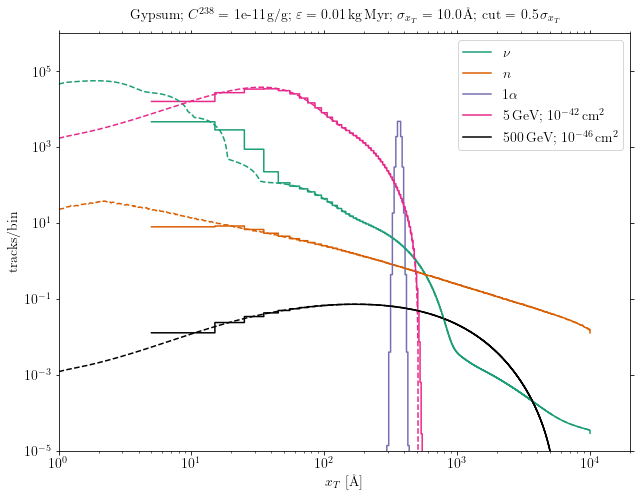

In [18]:
# test the smearing function 
# 1) linear bins with default settings except allow to change cutoff

res = 10.
cutoff = 0.5

sample_mass = 1e-5 # [kg]
sample_age = 1e3 # [Myr]

C238 = 1e-11

# get unbinned spectra
unbinned_bkg_nu_solar = SpecCalculator.calc_dRdx_BkgNeu_solar()
unbinned_bkg_nu_GSNB = SpecCalculator.calc_dRdx_BkgNeu_GSNB()
unbinned_bkg_nu_DSNB = SpecCalculator.calc_dRdx_BkgNeu_DSNB()
unbinned_bkg_nu_atm = SpecCalculator.calc_dRdx_BkgNeu_atm()
unbinned_bkg_rad_n = SpecCalculator.calc_dRdx_Bkgn(C238)
unbinned_DM_5 = SpecCalculator.calc_dRdx_MW(5., 1e-42)
unbinned_DM_500 = SpecCalculator.calc_dRdx_MW(500., 1e-46)

# get binned spectra
bin_edges = CalcSpectra.smear_and_bin(unbinned_bkg_nu_solar,
                                         res,
                                         cutoff = cutoff
                                         )[0]

sab_bkg_nu_solar = (
   CalcSpectra.smear_and_bin(unbinned_bkg_nu_solar,
      res,
      cutoff = cutoff
      )[1]
   * sample_age
   * sample_mass
   )

sab_bkg_nu_GSNB = (
   CalcSpectra.smear_and_bin(unbinned_bkg_nu_GSNB,
      res,
      cutoff = cutoff
      )[1]
   * sample_age
   * sample_mass
   )

sab_bkg_nu_DSNB = (
   CalcSpectra.smear_and_bin(unbinned_bkg_nu_DSNB,
      res,
      cutoff = cutoff
      )[1]
   * sample_age
   * sample_mass
   )

sab_bkg_nu_atm = (
   CalcSpectra.smear_and_bin(unbinned_bkg_nu_atm,
      res,
      cutoff = cutoff
      )[1]
   * sample_age
   * sample_mass
   )

sab_bkg_rad_n = (
   CalcSpectra.smear_and_bin(unbinned_bkg_rad_n,
      res,
      cutoff = cutoff
      )[1]
   * sample_age
   * sample_mass
   )

sab_DM_5 = (
   CalcSpectra.smear_and_bin(unbinned_DM_5,
      res,
      cutoff = cutoff
      )[1]
   * sample_age
   * sample_mass
   )

sab_DM_500 = (
   CalcSpectra.smear_and_bin(unbinned_DM_500,
      res,
      cutoff = cutoff
      )[1]
   * sample_age
   * sample_mass
   )

sab_bkg_rad_1a = (
   SpecCalculator.smear_and_bin_1a(C238, 
     res, 
     cutoff = cutoff
     )[1]
   * sample_mass
   )

plt.close('all')
# plot smeared&binned spectra
plt.step(bin_edges[:-1], sab_bkg_nu_solar+sab_bkg_nu_GSNB+sab_bkg_nu_DSNB+sab_bkg_nu_atm, where='post', color=plt_colors[1], label=r'$\nu$')
plt.step(bin_edges[:-1], sab_bkg_rad_n, where='post', color=plt_colors[2], label=r'$n$')
plt.step(bin_edges[:-1], sab_bkg_rad_1a, where='post', color=plt_colors[3], label=r'$1\alpha$')
plt.step(bin_edges[:-1], sab_DM_5, where='post', color=plt_colors[4], label=r'$5\,$GeV; $10^{-42}\,{\rm cm}^2$')
plt.step(bin_edges[:-1], sab_DM_500, where='post', color=plt_colors[0], label=r'$500\,$GeV; $10^{-46}\,{\rm cm}^2$')
# plot unbinned spectra
normfac = res*sample_mass*sample_age # match normlization of nbinned spectra to that of smeared&binned spectra
plt.plot(unbinned_bkg_nu_solar[0], normfac*(unbinned_bkg_nu_solar[1]+unbinned_bkg_nu_GSNB[1]+unbinned_bkg_nu_DSNB[1]+unbinned_bkg_nu_atm[1]), color=plt_colors[1], linestyle='--')
plt.plot(unbinned_bkg_rad_n[0], normfac*unbinned_bkg_rad_n[1], color=plt_colors[2], linestyle='--')
plt.plot(unbinned_DM_5[0], normfac*unbinned_DM_5[1], color=plt_colors[4], linestyle='--')
plt.plot(unbinned_DM_500[0], normfac*unbinned_DM_500[1], color=plt_colors[0], linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,2e4)
plt.ylim(1e-5,1e6)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'tracks/bin')
plt.legend()
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral
          +r'; $C^{238} = $ '+str(C238)+r'\,g/g'
          +r'; $\varepsilon = $ '+str(sample_mass*sample_age)+r'\,kg\,Myr'
          +r'; $\sigma_{x_T} = $ '+str(res)+r'\,\AA'
          +r'; cut = '+str(cutoff)+r'\,$\sigma_{x_T}$',
          y=1.02)
plt.tight_layout()
plt.show()

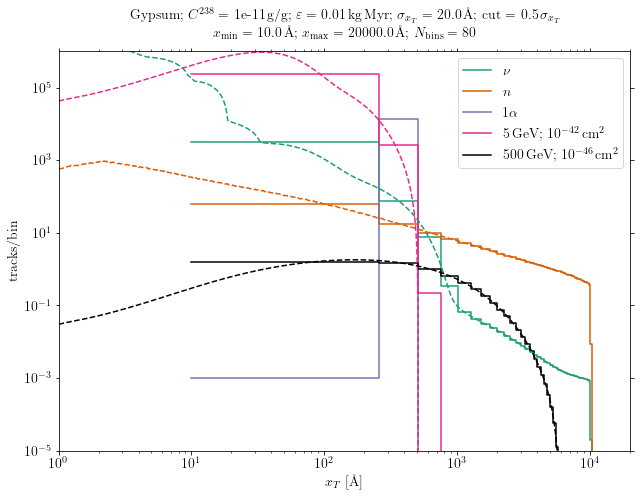

In [19]:
# test the smearing function 
# 2) linear bins with inputs for xmin, xmax, nbins

res = 20.
cutoff = 0.5

xmin = 10.
xmax = 2e4
nbins = 80

sample_mass = 1e-5 # [kg]
sample_age = 1e3 # [Myr]

C238 = 1e-11

# get unbinned spectra
unbinned_bkg_nu_solar = SpecCalculator.calc_dRdx_BkgNeu_solar()
unbinned_bkg_nu_GSNB = SpecCalculator.calc_dRdx_BkgNeu_GSNB()
unbinned_bkg_nu_DSNB = SpecCalculator.calc_dRdx_BkgNeu_DSNB()
unbinned_bkg_nu_atm = SpecCalculator.calc_dRdx_BkgNeu_atm()
unbinned_bkg_rad_n = SpecCalculator.calc_dRdx_Bkgn(C238)
unbinned_DM_5 = SpecCalculator.calc_dRdx_MW(5., 1e-42)
unbinned_DM_500 = SpecCalculator.calc_dRdx_MW(500., 1e-46)

# get binned spectra
bin_edges = CalcSpectra.smear_and_bin(unbinned_bkg_nu_solar,
                                      res,
                                      cutoff = cutoff,
                                      xmin = xmin,
                                      xmax = xmax,
                                      nbins = nbins
                                      )[0]

sab_bkg_nu_solar = (
   CalcSpectra.smear_and_bin(unbinned_bkg_nu_solar,
      res,
      cutoff = cutoff,
      xmin = xmin,
      xmax = xmax,
      nbins = nbins
      )[1]
   * sample_age
   * sample_mass
   )

sab_bkg_nu_GSNB = (
   CalcSpectra.smear_and_bin(unbinned_bkg_nu_GSNB,
      res,
      cutoff = cutoff,
      xmin = xmin,
      xmax = xmax,
      nbins = nbins
      )[1]
   * sample_age
   * sample_mass
   )

sab_bkg_nu_DSNB = (
   CalcSpectra.smear_and_bin(unbinned_bkg_nu_DSNB,
      res,
      cutoff = cutoff,
      xmin = xmin,
      xmax = xmax,
      nbins = nbins
      )[1]
   * sample_age
   * sample_mass
   )

sab_bkg_nu_atm = (
   CalcSpectra.smear_and_bin(unbinned_bkg_nu_atm,
      res,
      cutoff = cutoff,
      xmin = xmin,
      xmax = xmax,
      nbins = nbins
      )[1]
   * sample_age
   * sample_mass
   )

sab_bkg_rad_n = (
   CalcSpectra.smear_and_bin(unbinned_bkg_rad_n,
      res,
      cutoff = cutoff,
      xmin = xmin,
      xmax = xmax,
      nbins = nbins
      )[1]
   * sample_age
   * sample_mass
   )

sab_DM_5 = (
   CalcSpectra.smear_and_bin(unbinned_DM_5,
      res,
      cutoff = cutoff,
      xmin = xmin,
      xmax = xmax,
      nbins = nbins
      )[1]
   * sample_age
   * sample_mass
   )

sab_DM_500 = (
   CalcSpectra.smear_and_bin(unbinned_DM_500,
      res,
      cutoff = cutoff,
      xmin = xmin,
      xmax = xmax,
      nbins = nbins
      )[1]
   * sample_age
   * sample_mass
   )

sab_bkg_rad_1a = (
   SpecCalculator.smear_and_bin_1a(C238, 
     res, 
     cutoff = cutoff,
     xmin = xmin,
     xmax = xmax,
     nbins = nbins
     )[1]
   * sample_mass
   )

plt.close('all')
# plot smeared&binned spectra
plt.step(bin_edges[:-1], sab_bkg_nu_solar+sab_bkg_nu_GSNB+sab_bkg_nu_DSNB+sab_bkg_nu_atm, where='post', color=plt_colors[1], label=r'$\nu$')
plt.step(bin_edges[:-1], sab_bkg_rad_n, where='post', color=plt_colors[2], label=r'$n$')
plt.step(bin_edges[:-1], sab_bkg_rad_1a, where='post', color=plt_colors[3], label=r'$1\alpha$')
plt.step(bin_edges[:-1], sab_DM_5, where='post', color=plt_colors[4], label=r'$5\,$GeV; $10^{-42}\,{\rm cm}^2$')
plt.step(bin_edges[:-1], sab_DM_500, where='post', color=plt_colors[0], label=r'$500\,$GeV; $10^{-46}\,{\rm cm}^2$')
# plot unbinned spectra
normfac = ((xmax-xmin)/nbins)*sample_mass*sample_age # match normlization of nbinned spectra to that of smeared&binned spectra
plt.plot(unbinned_bkg_nu_solar[0], normfac*(unbinned_bkg_nu_solar[1]+unbinned_bkg_nu_GSNB[1]+unbinned_bkg_nu_DSNB[1]+unbinned_bkg_nu_atm[1]), color=plt_colors[1], linestyle='--')
plt.plot(unbinned_bkg_rad_n[0], normfac*unbinned_bkg_rad_n[1], color=plt_colors[2], linestyle='--')
plt.plot(unbinned_DM_5[0], normfac*unbinned_DM_5[1], color=plt_colors[4], linestyle='--')
plt.plot(unbinned_DM_500[0], normfac*unbinned_DM_500[1], color=plt_colors[0], linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,2e4)
plt.ylim(1e-5,1e6)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'tracks/bin')
plt.legend()
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral
          +r'; $C^{238} = $ '+str(C238)+r'\,g/g'
          +r'; $\varepsilon = $ '+str(sample_mass*sample_age)+r'\,kg\,Myr'
          +r'; $\sigma_{x_T} = $ '+str(res)+r'\,\AA'
          +r'; cut = '+str(cutoff)+r'\,$\sigma_{x_T}$'
          +'\n'
          +r'$x_{\rm min} = $ '+str(xmin)+r'\,\AA'
          +r'; $x_{\rm max} = $ '+str(xmax)+r'\,\AA'
          +r'; $N_{\rm bins} = $ '+str(nbins),
          y=1.02)
plt.tight_layout()
plt.show()

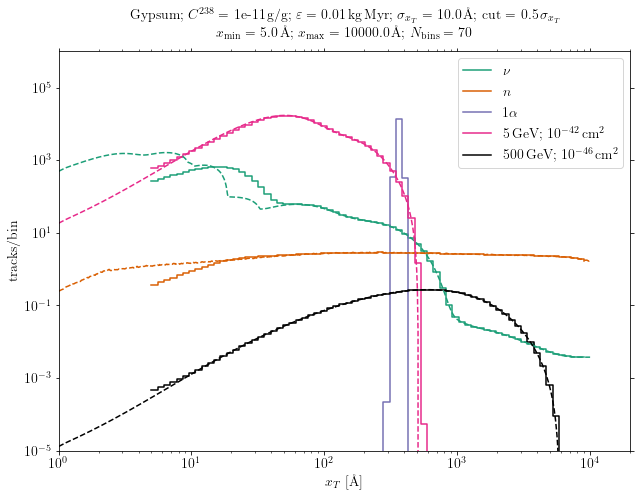

In [20]:
# test the smearing function 
# 3) log bins with inputs for xmin, xmax, nbins

res = 10.
cutoff = 0.5

xmin = res/2.
xmax = 1e4
nbins = 70

sample_mass = 1e-5 # [kg]
sample_age = 1e3 # [Myr]

C238 = 1e-11

# get unbinned spectra
unbinned_bkg_nu_solar = SpecCalculator.calc_dRdx_BkgNeu_solar()
unbinned_bkg_nu_GSNB = SpecCalculator.calc_dRdx_BkgNeu_GSNB()
unbinned_bkg_nu_DSNB = SpecCalculator.calc_dRdx_BkgNeu_DSNB()
unbinned_bkg_nu_atm = SpecCalculator.calc_dRdx_BkgNeu_atm()
unbinned_bkg_rad_n = SpecCalculator.calc_dRdx_Bkgn(C238)
unbinned_DM_5 = SpecCalculator.calc_dRdx_MW(5., 1e-42)
unbinned_DM_500 = SpecCalculator.calc_dRdx_MW(500., 1e-46)

# get binned spectra
bin_edges = CalcSpectra.smear_and_bin(unbinned_bkg_nu_solar,
                                      res,
                                      cutoff = cutoff,
                                      xmin = xmin,
                                      xmax = xmax,
                                      nbins = nbins,
                                      logbins = True
                                      )[0]

sab_bkg_nu_solar = (
   CalcSpectra.smear_and_bin(unbinned_bkg_nu_solar,
      res,
      cutoff = cutoff,
      xmin = xmin,
      xmax = xmax,
      nbins = nbins,
      logbins = True
      )[1]
   * sample_age
   * sample_mass
   )

sab_bkg_nu_GSNB = (
   CalcSpectra.smear_and_bin(unbinned_bkg_nu_GSNB,
      res,
      cutoff = cutoff,
      xmin = xmin,
      xmax = xmax,
      nbins = nbins,
      logbins = True
      )[1]
   * sample_age
   * sample_mass
   )

sab_bkg_nu_DSNB = (
   CalcSpectra.smear_and_bin(unbinned_bkg_nu_DSNB,
      res,
      cutoff = cutoff,
      xmin = xmin,
      xmax = xmax,
      nbins = nbins,
      logbins = True
      )[1]
   * sample_age
   * sample_mass
   )

sab_bkg_nu_atm = (
   CalcSpectra.smear_and_bin(unbinned_bkg_nu_atm,
      res,
      cutoff = cutoff,
      xmin = xmin,
      xmax = xmax,
      nbins = nbins,
      logbins = True
      )[1]
   * sample_age
   * sample_mass
   )

sab_bkg_rad_n = (
   CalcSpectra.smear_and_bin(unbinned_bkg_rad_n,
      res,
      cutoff = cutoff,
      xmin = xmin,
      xmax = xmax,
      nbins = nbins,
      logbins = True
      )[1]
   * sample_age
   * sample_mass
   )

sab_DM_5 = (
   CalcSpectra.smear_and_bin(unbinned_DM_5,
      res,
      cutoff = cutoff,
      xmin = xmin,
      xmax = xmax,
      nbins = nbins,
      logbins = True
      )[1]
   * sample_age
   * sample_mass
   )

sab_DM_500 = (
   CalcSpectra.smear_and_bin(unbinned_DM_500,
      res,
      cutoff = cutoff,
      xmin = xmin,
      xmax = xmax,
      nbins = nbins,
      logbins = True
      )[1]
   * sample_age
   * sample_mass
   )

sab_bkg_rad_1a = (
   SpecCalculator.smear_and_bin_1a(C238, 
     res, 
     cutoff = cutoff,
     xmin = xmin,
     xmax = xmax,
     nbins = nbins,
     logbins = True
     )[1]
   * sample_mass
   )

plt.close('all')
# plot smeared&binned spectra
plt.step(bin_edges[:-1], sab_bkg_nu_solar+sab_bkg_nu_GSNB+sab_bkg_nu_DSNB+sab_bkg_nu_atm, where='post', color=plt_colors[1], label=r'$\nu$')
plt.step(bin_edges[:-1], sab_bkg_rad_n, where='post', color=plt_colors[2], label=r'$n$')
plt.step(bin_edges[:-1], sab_bkg_rad_1a, where='post', color=plt_colors[3], label=r'$1\alpha$')
plt.step(bin_edges[:-1], sab_DM_5, where='post', color=plt_colors[4], label=r'$5\,$GeV; $10^{-42}\,{\rm cm}^2$')
plt.step(bin_edges[:-1], sab_DM_500, where='post', color=plt_colors[0], label=r'$500\,$GeV; $10^{-46}\,{\rm cm}^2$')
# plot unbinned spectra
normfac = 2.*(bin_edges[1]-bin_edges[0])/(bin_edges[1]+bin_edges[0])*sample_mass*sample_age # match normlization of nbinned spectra to that of smeared&binned spectra
plt.plot(unbinned_bkg_nu_solar[0], normfac*unbinned_bkg_nu_solar[0]*(unbinned_bkg_nu_solar[1]+unbinned_bkg_nu_GSNB[1]+unbinned_bkg_nu_DSNB[1]+unbinned_bkg_nu_atm[1]), color=plt_colors[1], linestyle='--')
plt.plot(unbinned_bkg_rad_n[0], normfac*unbinned_bkg_rad_n[0]*unbinned_bkg_rad_n[1], color=plt_colors[2], linestyle='--')
plt.plot(unbinned_DM_5[0], normfac*unbinned_DM_5[0]*unbinned_DM_5[1], color=plt_colors[4], linestyle='--')
plt.plot(unbinned_DM_500[0], normfac*unbinned_DM_500[0]*unbinned_DM_500[1], color=plt_colors[0], linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,2e4)
plt.ylim(1e-5,1e6)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'tracks/bin')
plt.legend()
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(mineral
          +r'; $C^{238} = $ '+str(C238)+r'\,g/g'
          +r'; $\varepsilon = $ '+str(sample_mass*sample_age)+r'\,kg\,Myr'
          +r'; $\sigma_{x_T} = $ '+str(res)+r'\,\AA'
          +r'; cut = '+str(cutoff)+r'\,$\sigma_{x_T}$'
          +'\n'
          +r'$x_{\rm min} = $ '+str(xmin)+r'\,\AA'
          +r'; $x_{\rm max} = $ '+str(xmax)+r'\,\AA'
          +r'; $N_{\rm bins} = $ '+str(nbins),
          y=1.02)
plt.tight_layout()
plt.show()

In [21]:
# test the smearing function 
# 4) test that the sum over the whole binned spectrum matches the integral over the unbinned spectra
#    mod effects from the bins not spanning the entire track length range

res = 150.
cutoff = 0.5

xmin = 75.
xmax = 1e4
nbins = 100
switch_logbins = True

sample_mass = 1e-3 # [kg]
sample_age = 1e-3 # [Myr]

# get unbinned spectrum
unbinned_spec = SpecCalculator.calc_dRdx_BkgNeu_solar()

# get binned spectra
sab_spec = (
   CalcSpectra.smear_and_bin(unbinned_spec,
      res,
      cutoff = cutoff,
      xmin = xmin,
      xmax = xmax,
      nbins = nbins,
      logbins = switch_logbins
      )[1]
   * sample_age
   * sample_mass
   )

#######################################
print("sum binned spectrum:", 
    np.sum(sab_spec)
)
icut = 400
print("integral over unbinned spectrum:", 
    np.trapz(
        unbinned_spec[1][icut:],
        x = unbinned_spec[0][icut:]
    )
    * sample_age*sample_mass
)
print("after cutting at ", unbinned_spec[0][icut], " Å")

sum binned spectrum: 0.03227876966511481
integral over unbinned spectrum: 0.03286395943240407
after cutting at  100.0  Å


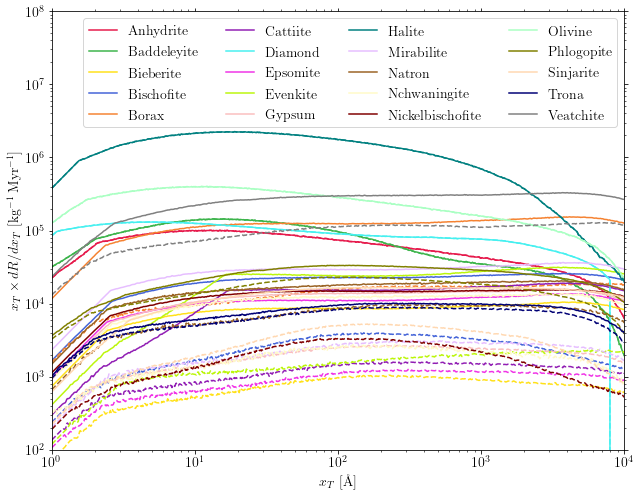

In [22]:
# make sure that the code doesn't break for some choice of mineral
plt_colors = ['#e6194b',
   '#3cb44b',
   '#ffe119',
   '#4363d8',
   '#f58231',
   '#911eb4',
   '#46f0f0',
   '#f032e6',
   '#bcf60c',
   '#fabebe',
   '#008080',
   '#e6beff',
   '#9a6324',
   '#fffac8',
   '#800000',
   '#aaffc3',
   '#808000',
   '#ffd8b1',
   '#000075',
   '#808080',
   '#ffffff',
   '#000000']

for i, mineral in enumerate(CalcSpectra.good_mineral_list):
    SpecCalculator = CalcSpectra.CalcSpectra(mineral, switch_keep_H=True)
    spec = SpecCalculator.calc_dRdx_Bkgn(1e-11)
    plt.plot(spec[0], spec[0]*spec[1], color=plt_colors[i], linestyle='-', label=mineral)
    SpecCalculator = CalcSpectra.CalcSpectra(mineral, switch_keep_H=False)
    spec = SpecCalculator.calc_dRdx_Bkgn(1e-11)
    plt.plot(spec[0], spec[0]*spec[1], color=plt_colors[i], linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e4)
plt.ylim(1e2,1e8)
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'$x_T \times dR/dx_T$ [kg$^{-1}$\,Myr$^{-1}$]')
plt.legend(ncol=4)
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.tight_layout()
plt.show()